In [1]:
!pwd
#%cd Trajectory


/Users/obara/Library/CloudStorage/OneDrive-東京理科大学/2022研究室/卒論/コード関係/yuzz2516_Trajectory/Trajectory/notebooks


In [2]:
#%cd ..
import argparse
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np



from utils.parser import *
from utils.homography import *

/Users/obara/Library/CloudStorage/OneDrive-東京理科大学/2022研究室/卒論/コード関係/yuzz2516_Trajectory/Trajectory


In [3]:
path_1= 'thumbnails/sit_study.png'                                               # 画像のパス
i_1 = cv2.imread(path_1, 1)

figure = "thumbnails/sit_figure_1920_1080_zoom.png"                           # 画像読み込み
figure_1 = cv2.imread(figure, 1)

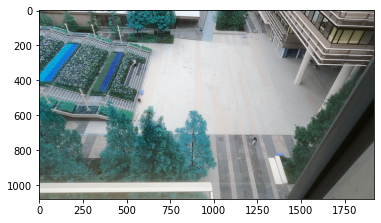

In [4]:
plt.imshow(i_1)


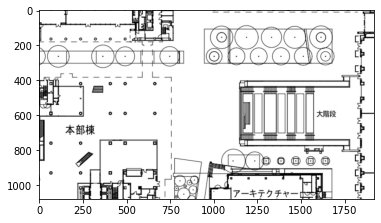

In [5]:
plt.imshow(figure_1)

## 点の場所を確認するため


In [11]:
import cv2
import numpy as np

img=cv2.imread(path_1,cv2.IMREAD_GRAYSCALE)

def mouse_move(event, x, y, flags, params):
    if event == cv2.EVENT_MOUSEMOVE:
        img2 = np.copy(img)
        cv2.circle(img2,center=(x,y),radius=5,color=255,thickness=-1)
        pos_str='(x,y)=('+str(x)+','+str(y)+')'
        cv2.putText(img2,pos_str,(30, 30),cv2.FONT_HERSHEY_PLAIN,2,255,2,cv2.LINE_AA)
        cv2.imshow('window', img2)
     
cv2.imshow('window', img)
cv2.setMouseCallback('window', mouse_move)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
import cv2
import numpy as np

img=cv2.imread(figure,cv2.IMREAD_GRAYSCALE)

def mouse_move(event, x, y, flags, params):
    if event == cv2.EVENT_MOUSEMOVE:
        img2 = np.copy(img)
        cv2.circle(img2,center=(x,y),radius=5,color=0,thickness=-1)
        pos_str='(x,y)=('+str(x)+','+str(y)+')'
        cv2.putText(img2,pos_str,(30, 30),cv2.FONT_HERSHEY_PLAIN,2,0,2,cv2.LINE_AA)
        cv2.imshow('window', img2)
     
cv2.imshow('window', img)
cv2.setMouseCallback('window', mouse_move)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 射影変換

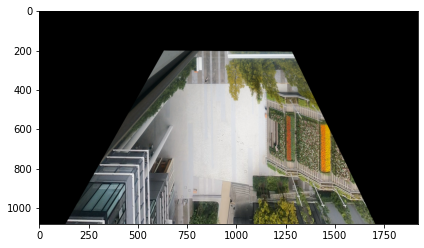

In [6]:
# 変換前後の対応点を設定
p_original = np.float32([[775,156], [1391,275], [1398, 991], [544, 590]])
p_trans = np.float32([[1082,890], [677,744], [808,235], [1153,441]])

# 変換マトリクスと射影変換
M = cv2.getPerspectiveTransform(p_original, p_trans)
i_trans = cv2.warpPerspective(i_1, M, (1920, 1080))

cv2.imwrite("out.jpg", i_trans)
 
#ここからグラフ設定
fig = plt.figure()
ax1 = fig.add_subplot(111)
 
# 画像をプロット
show = cv2.cvtColor(i_trans, cv2.COLOR_BGR2RGB)
ax1.imshow(show)
 
fig.tight_layout()
plt.show()
plt.close()

# トラッキング座標の変換

In [18]:
text_point = np.array([1218.38,725.36,1])
#i_trans = cv2.warpPerspective(text_point, M, (1920, 1080))
print(M)
a= np.dot(M,text_point)
print(a)
w= a[2]
x,y = [a[0]/w,a[1]/w]
print(x,y)

[[-8.94467978e-01  1.35855203e+00  1.72875402e+03]
 [-2.35690028e-02 -5.75754723e-01  1.13419569e+03]
 [-8.13154018e-05  1.38432206e-03  1.00000000e+00]]
[1624.39143059  687.85024195    1.90505879]
852.6726008666185 361.06510029754935


In [38]:
text = "texts/1012_study.txt"
df = parser_byte(text)
#df = centerize(df)
df

,frame,ID,x,y,w,h
0,1,1,1218.38,725.36,32.39,54.36
1,2,1,1217.92,725.66,32.23,53.96
2,3,1,1217.80,728.32,31.11,51.80
3,4,1,1217.19,729.12,30.92,51.16
4,5,1,1217.17,730.31,30.56,50.02
...,...,...,...,...,...,...
87226,12743,403,1172.01,934.92,30.56,54.96
87227,12743,404,1203.36,945.44,43.58,68.10
87228,12743,405,1204.67,1020.77,30.50,55.69
87229,12743,406,1274.44,1029.32,36.77,61.23


## ここから下が射影変換についての基本

In [3]:
# 射影変換，追跡座標変換，
#%cd ..
import argparse
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import numpy as np


from utils.parser import *
from utils.homography import *

text = "texts/1012_study.txt"
df = parser_byte(text)

p_original = point_to_list(775,156, 1391,275 ,1398, 991 ,544, 590)
p_trans = point_to_list(1082,890, 677,744, 808,235, 1153,441)

M = homography_trans(p_original,p_trans)
print(M)

df['x_c'] = df['x'] + df['w']/2
df['y_c'] = df['y'] + df['h']/2
df2 = df.drop(columns=["frame", "ID", "x", "y", "w","h"])
i = 0
x_homo_list = []
y_homo_list = []
for index, row in df2.iterrows():
   x_c,y_c = (row['x_c'],row['y_c'])
   P = [x_c,y_c,1]
   t_p = np.dot(M,P)
   w= t_p[2]
   x_homo,y_homo = [t_p[0]/w,t_p[1]/w]
   x_homo_list.append(x_homo)
   y_homo_list.append(y_homo)

df['x_trans'] = x_homo_list
df['y_trans'] = y_homo_list

print(df)

[[-8.94467978e-01  1.35855203e+00  1.72875402e+03]
 [-2.35690028e-02 -5.75754723e-01  1.13419569e+03]
 [-8.13154018e-05  1.38432206e-03  1.00000000e+00]]
       frame   ID        x        y      w      h       x_c       y_c  \
0          1    1  1218.38   725.36  32.39  54.36  1234.575   752.540   
1          2    1  1217.92   725.66  32.23  53.96  1234.035   752.640   
2          3    1  1217.80   728.32  31.11  51.80  1233.355   754.220   
3          4    1  1217.19   729.12  30.92  51.16  1232.650   754.700   
4          5    1  1217.17   730.31  30.56  50.02  1232.450   755.320   
...      ...  ...      ...      ...    ...    ...       ...       ...   
87226  12743  403  1172.01   934.92  30.56  54.96  1187.290   962.400   
87227  12743  404  1203.36   945.44  43.58  68.10  1225.150   979.490   
87228  12743  405  1204.67  1020.77  30.50  55.69  1219.920  1048.615   
87229  12743  406  1274.44  1029.32  36.77  61.23  1292.825  1059.935   
87230  12743  407  1240.11  1031.58  33.43 

/var/folders/s_/rl9604cd5r1026gskr5tdp580000gq/T/ipykernel_82771/2471054062.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_c_trans, y_c_trans, cmap='jet', s=0.01)


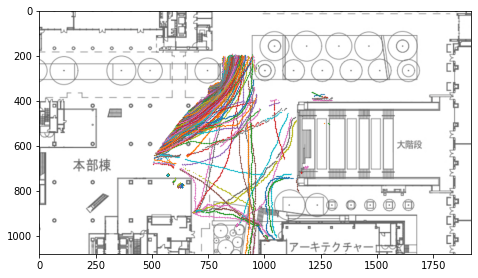

In [4]:
# 追跡変換座標を描画
fig = plt.figure(facecolor="w")
ax = fig.add_subplot(1, 1, 1, aspect="equal")
#df = df.query('frame < 5000')

for ID, group in df.groupby('ID'):
    frame = group['frame']
    car_id = group['ID']
    id_max = max(car_id)
    id_min = min(car_id)
    x_min = group['x']
    y_min = group['y']
    w = group['w']
    h = group['h']
    f_max = max(frame)
    f_min = min(frame)
    x_c_trans = group['x_trans']
    y_c_trans = group['y_trans']
    #print(f_max, f_min, car_id)
    

    x_c = x_min + w / 2
    y_c = y_min + h
    color = (car_id - id_min) / (id_max - id_min)
    plt.scatter(x_c_trans, y_c_trans, cmap='jet', s=0.01)

im = Image.open('thumbnails/sit_figure_1920_1080_zoom.png')
#sns.scatterplot(x=X[:,0], y=X[:,1], hue=["cluster-{}".format(x) for x in labels])
plt.imshow(im, alpha=0.6)
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.savefig('output_1.png')


# 速度推定

In [5]:
df_speed = df.drop(columns=["x", "y", "w", "h",'x_c','y_c'])
#df_speed = df_speed.query('2< ID < 6')
#df_speed = df_speed.groupby(['ID'])
print(df_speed)

       frame   ID     x_trans     y_trans
0          1    1  848.283876  346.054747
1          2    1  848.522958  345.999148
2          3    1  848.961234  345.140221
3          4    1  849.305754  344.878526
4          5    1  849.448883  344.542416
...      ...  ...         ...         ...
87226  12743  403  883.038037  246.947058
87227  12743  404  870.265235  239.938253
87228  12743  405  876.616599  213.268804
87229  12743  406  851.905124  208.902659
87230  12743  407  864.865395  206.866755

[87231 rows x 4 columns]


In [6]:
df_speed_f = df_speed.groupby(['ID'],as_index=False).first()
df_speed_f


,ID,frame,x_trans,y_trans
0,1,1,848.283876,346.054747
1,2,374,915.112557,234.973985
2,4,475,650.429818,464.454612
3,5,529,761.456583,342.665223
4,6,642,753.138979,359.084848
...,...,...,...,...
272,403,12698,894.109739,198.308352
273,404,12702,883.216751,200.456351
274,405,12730,878.686691,203.748359
275,406,12734,852.990368,201.297031


In [7]:
df_speed_l = df_speed.groupby(['ID'],as_index=False).last()
df_speed_l

,ID,frame,x_trans,y_trans
0,1,116,863.092573,263.077391
1,2,920,581.691009,545.234133
2,4,591,718.375309,391.902056
3,5,620,827.445764,259.659833
4,6,837,863.796473,225.578071
...,...,...,...,...
272,403,12743,883.038037,246.947058
273,404,12743,870.265235,239.938253
274,405,12743,876.616599,213.268804
275,406,12743,851.905124,208.902659


In [8]:
cols = ['ID','all_distance','frame_dif']
df_frame_info = pd.DataFrame(index=[], columns=cols)
#print(df_frame_info)

id_num = df_speed['ID'].unique()
for id in id_num:
    
    #print(id)
    df_speed_id = df_speed.query('ID==@id')
    x_y = df_speed_id[['x_trans','y_trans']].values
    #print(x_y)
    # 各点間の差を取得
    x_y = np.diff(x_y, axis=0)
    # 各点間のユークリッド距離を計算
    every_distance = np.linalg.norm(x_y, axis=1)
    #print(every_distance)
    all_distance = np.sum(every_distance)
    #print(all_distance)

    #フレーム差を取得
    df_speed_f = df_speed.groupby(['ID'],as_index=False).first()
    df_speed_l = df_speed.groupby(['ID'],as_index=False).last()
    
    frame_f = df_speed_f.query('ID==@id')
    frame_f = frame_f.iloc[0,1]
    
    frame_l = df_speed_l.query('ID==@id')
    frame_l = frame_l.iloc[0,1]
    frame_dif = frame_l - frame_f
    #print(frame_dif)

    append_list = pd.Series([id,all_distance,frame_dif],index=['ID','all_distance','frame_dif'])
    df_frame_info = df_frame_info.append(append_list,ignore_index=True)
    #print(df_frame_info)

print(df_frame_info)

    
    

    
    

    
    

        ID  all_distance  frame_dif
0      1.0     90.306983      115.0
1      2.0    486.310814      546.0
2      4.0    102.904092      116.0
3      5.0    118.065520       91.0
4      6.0    181.670673      195.0
..     ...           ...        ...
272  403.0     51.134085       45.0
273  404.0     42.494427       41.0
274  405.0     11.076714       13.0
275  406.0      7.832656        9.0
276  407.0      5.566648        8.0

[277 rows x 3 columns]


### 実際の地図の縮尺に合わせて速度導出


In [16]:
fps = 24
expansion = 1/1000

use_figure_len = 44 #(44mm,実際に合わせた地図,基準の距離を測る)
use_figure_pxcel_h = 1080
use_figure_pxcel_w = 1920

# 換算計算
real_len = use_figure_len / expansion / 1000
print(real_len)
cel_real_len = real_len / use_figure_pxcel_h

df_frame_info['real_speed'] = 3.6*(df_frame_info['all_distance'] * cel_real_len)/(df_frame_info['frame_dif']/fps)
print(df_frame_info)
df_frame_info.mean()










44.0
        ID  all_distance  frame_dif  real_speed
0      1.0     90.306983      115.0    2.764179
1      2.0    486.310814      546.0    3.135191
2      4.0    102.904092      116.0    3.122607
3      5.0    118.065520       91.0    4.566930
4      6.0    181.670673      195.0    3.279389
..     ...           ...        ...         ...
272  403.0     51.134085       45.0    3.999822
273  404.0     42.494427       41.0    3.648302
274  405.0     11.076714       13.0    2.999233
275  406.0      7.832656        9.0    3.063439
276  407.0      5.566648        8.0    2.449325

[277 rows x 4 columns]


ID              199.779783
all_distance    278.768519
frame_dif       326.234657
real_speed        3.172071
dtype: float64

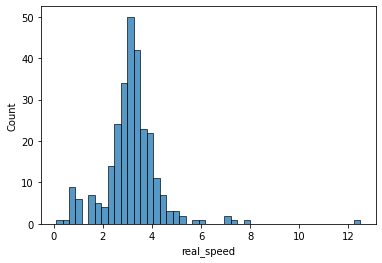

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#df = sns.load_dataset("iris")  #手元にiris.csvがない場合

sns.histplot(df_frame_info['real_speed'],kde = None)
plt.show()